In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mcdonalds-segmentation-dataset/mcdonalds.csv


In [2]:
df = pd.read_csv('/kaggle/input/mcdonalds-segmentation-dataset/mcdonalds.csv')
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [5]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
df.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [7]:
df.shape

(1453, 15)

In [8]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [9]:
df['yummy'] = df['yummy'].map({'Yes': 1, 'No':0})
df['convenient'] = df['convenient'].map({'Yes': 1, 'No':0})
df['spicy'] = df['spicy'].map({'Yes': 1, 'No':0})
df['fattening'] = df['fattening'].map({'Yes': 1, 'No':0})
df['greasy'] = df['greasy'].map({'Yes': 1, 'No':0})
df['fast'] = df['fast'].map({'Yes': 1, 'No':0})
df['cheap'] = df['cheap'].map({'Yes': 1, 'No':0})
df['tasty'] = df['tasty'].map({'Yes': 1, 'No':0})
df['expensive'] = df['expensive'].map({'Yes': 1, 'No':0})
df['healthy'] = df['healthy'].map({'Yes': 1, 'No':0})
df['disgusting'] = df['disgusting'].map({'Yes': 1, 'No':0})
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
5,1,1,0,1,0,1,1,1,0,0,0,+2,55,Every three months,Male
6,1,1,1,1,0,1,0,1,1,1,0,+2,56,Every three months,Female
7,1,1,0,1,1,1,1,1,0,0,0,I love it!+5,23,Once a week,Female
8,0,0,0,1,1,0,0,0,1,0,1,I hate it!-5,58,Once a year,Male
9,1,1,0,1,1,1,0,1,1,0,0,+1,32,Every three months,Female


In [10]:
df2 = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]
df2


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [11]:
df2.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [12]:
pca = PCA()
pca.fit(df2) 

PCA()

In [13]:
pca.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859],
       [ 0.17073819, -0.34783006, -0.3550866 , -0.40651542,  0.20934711,
        -0.59463206, -0.10324067, -0.07691443, -0.26134151, -0.17822612,
        -0.210

In [14]:
PCs = pca.components_
explained_variance_ratios = pca.explained_variance_ratio_
mean = pca.mean_
cumulative_prop_var = np.cumsum(explained_variance_ratios)
transformed_data = pca.transform(df2)

stddev = np.sqrt(pca.explained_variance_)

variance = (pca.explained_variance_ * (pca.explained_variance_.shape[0] - 1))[::-1]

n_components = PCs.shape[1]
print(f'Number of components: {n_components}')

print('Standard deviations of principal components:')
print(stddev)

print('Propotion of Variance:')
print(explained_variance_ratios)

print('Cumulative Propotion')
print(cumulative_prop_var)

Number of components: 11
Standard deviations of principal components:
[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
Propotion of Variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Propotion
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [15]:
print('Rotation (n x k) = (11 x 11):')
rotation = pca.components_
print(f'\tPC1\tPC2\tPC3\tPC4\tPC5\tPC6\tPC7\tPC8\tPC9\tPC10\tPC11')
for i in range(rotation.shape[1]):
    print(f'{i+1:02d}\t{rotation[0,i]:.3f}\t{rotation[1,i]:.3f}\t{rotation[2,i]:.3f}\t{rotation[3,i]:.3f}\t{rotation[4,i]:.3f}\t{rotation[5,i]:.3f}\t{rotation[6,i]:.3f}\t{rotation[7,i]:.3f}\t{rotation[8,i]:.3f}\t{rotation[9,i]:.3f}\t{rotation[10,i]:.3f}')


Rotation (n x k) = (11 x 11):
	PC1	PC2	PC3	PC4	PC5	PC6	PC7	PC8	PC9	PC10	PC11
01	-0.477	0.364	-0.304	0.055	-0.308	0.171	-0.281	0.013	0.572	-0.110	0.045
02	-0.155	0.016	-0.063	-0.142	0.278	-0.348	-0.060	-0.113	-0.018	-0.666	-0.542
03	-0.006	0.019	-0.037	0.198	0.071	-0.355	0.708	0.376	0.400	-0.076	0.142
04	0.116	-0.034	-0.322	-0.354	-0.073	-0.407	-0.386	0.590	-0.161	-0.005	0.251
05	0.304	-0.064	-0.802	0.254	0.361	0.209	0.036	-0.138	-0.003	0.009	0.002
06	-0.108	-0.087	-0.065	-0.097	0.108	-0.595	-0.087	-0.628	0.166	0.240	0.339
07	-0.337	-0.611	-0.149	0.119	-0.129	-0.103	-0.040	0.140	0.076	0.428	-0.489
08	-0.472	0.307	-0.287	-0.003	-0.211	-0.077	0.360	-0.073	-0.639	0.079	0.020
09	0.329	0.601	0.024	0.068	-0.003	-0.261	-0.068	0.030	0.067	0.454	-0.490
10	-0.214	0.077	0.192	0.763	0.288	-0.178	-0.350	0.176	-0.186	-0.038	0.158
11	0.375	-0.140	-0.089	0.370	-0.729	-0.211	-0.027	-0.167	-0.072	-0.290	-0.041


In [16]:
transformed_data

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

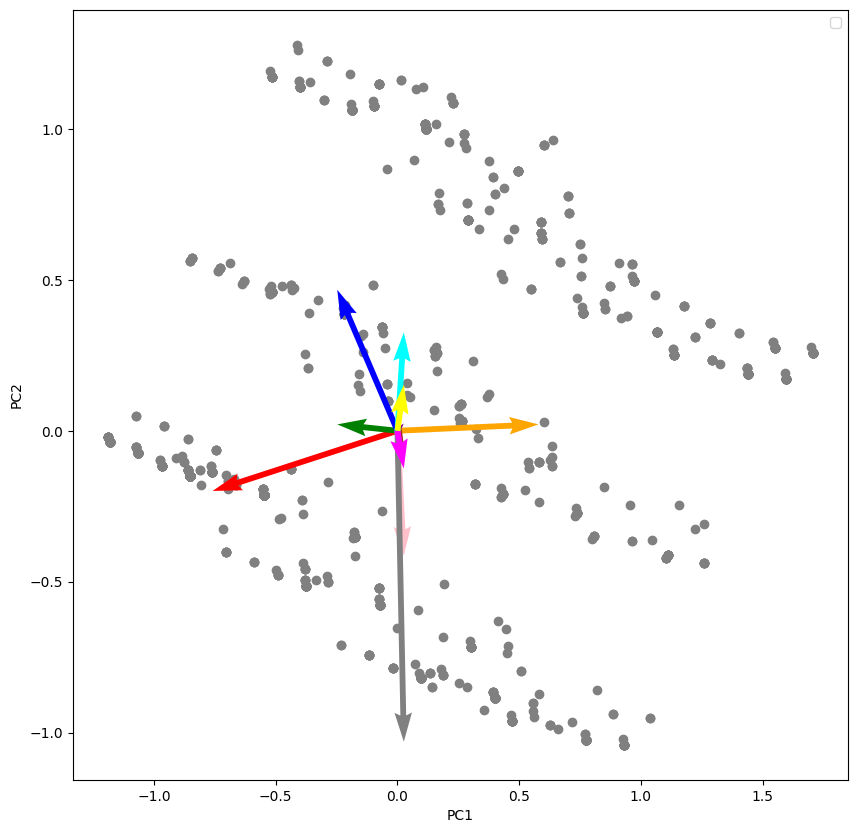

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], color="grey")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Plot the principal component axes
ax.quiver(0, 0, PCs[0, 0], PCs[0, 1], color="red",scale=2)
ax.quiver(0, 0, PCs[0, 1], PCs[1, 1], color="green",scale=2)
ax.quiver(0, 0, PCs[0, 1], PCs[1, 0], color="blue",scale=2)
ax.quiver(0, 0, PCs[1, 0], PCs[1, 1], color="orange",scale=2)
ax.quiver(0, 0, PCs[1, 1], PCs[1, 2], color="purple",scale=2)
ax.quiver(0, 0, PCs[1, 1], PCs[2, 2], color="brown",scale=2)
ax.quiver(0, 0, PCs[1, 1], PCs[2, 3], color="pink",scale=2)
ax.quiver(0, 0, PCs[1, 1], PCs[2, 4], color="grey",scale=2)
ax.quiver(0, 0, PCs[1, 1], PCs[3, 4], color="cyan",scale=2)
ax.quiver(0, 0, PCs[1, 1], PCs[3, 5], color="magenta", scale=2)
ax.quiver(0, 0, PCs[1, 1], PCs[3, 6], color="yellow", scale=2)

ax.legend()

plt.show()

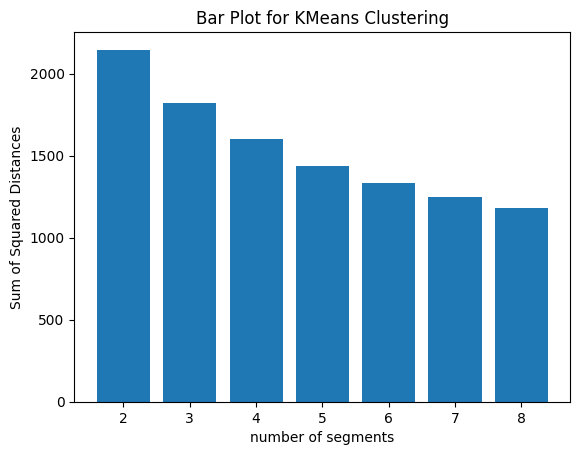

In [18]:
from sklearn.cluster import KMeans

np.random.seed(1234)
n_clusters = range(2, 9)
n_init = 10
clusters = []
for n in n_clusters:
    clusters.append(KMeans(n_clusters=n, n_init=n_init, random_state=1234).fit(df2))

      
plt.bar(range(2, 9), [cluster.inertia_ for cluster in clusters])
plt.xlabel("number of segments")
plt.title('Bar Plot for KMeans Clustering')
plt.ylabel('Sum of Squared Distances')
plt.show()



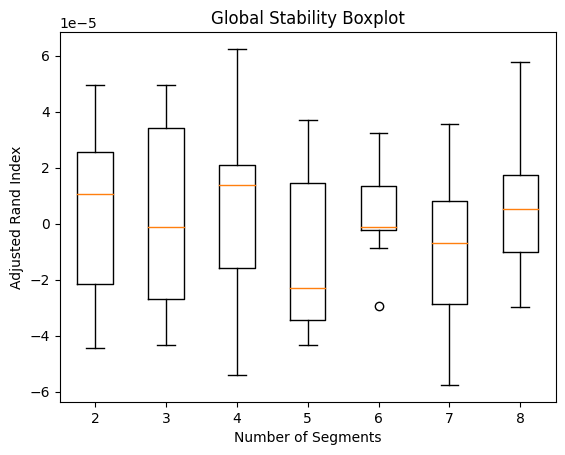

In [19]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)
def calculate_global_stability(data, num_segments_range, nboot=100, nrep=10):
    stability_scores = []

    for num_segments in num_segments_range:
        stability_replicates = []

        for _ in range(nrep):
            replicates = []

            for _ in range(nboot):
               
                bootstrap_sample = resample(data)

                
                kmeans = KMeans(n_clusters=num_segments, n_init=1)
                labels = kmeans.fit_predict(bootstrap_sample)

                replicates.append(labels)

            
            stability = np.mean([adjusted_rand_score(replicates[i], replicates[j]) for i in range(nboot) for j in range(i + 1, nboot)])
            stability_replicates.append(stability)

        stability_scores.append(stability_replicates)

    return np.array(stability_scores)

num_segments_range = range(2, 9)
global_stability = calculate_global_stability(df2, num_segments_range, nboot=100, nrep=10)

# Visualizing the results
import matplotlib.pyplot as plt

plt.boxplot(global_stability.T, labels=[str(num_segments) for num_segments in num_segments_range])
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Boxplot")
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


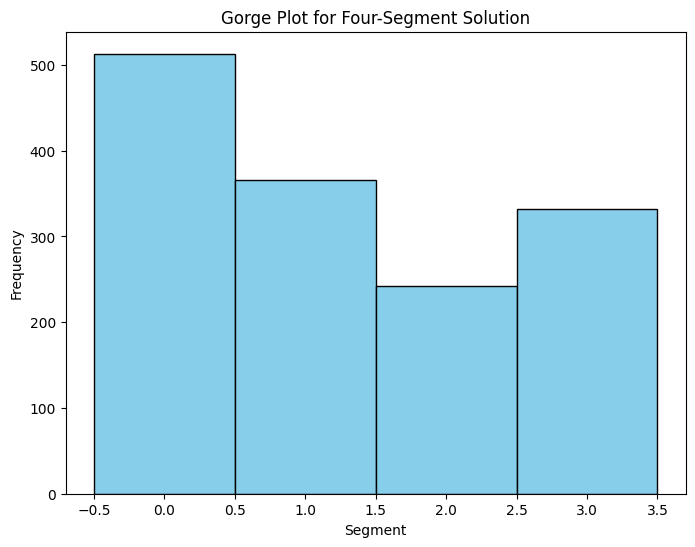

In [20]:
MD_kmeans = KMeans(n_clusters=4, random_state=1234).fit(df2)


plt.figure(figsize=(8, 6))
plt.hist(MD_kmeans.labels_, bins=np.arange(5)-0.5, edgecolor='black', color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.title('Gorge Plot for Four-Segment Solution')
plt.show()

In [21]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

n_components_range = range(2, 9)
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(df2.values)
    bic_scores.append(gmm.bic(df2.values))

optimal_n_components = n_components_range[np.argmin(bic_scores)]

best_gmm = GaussianMixture(n_components=optimal_n_components, random_state=1234)
best_gmm.fit(df2.values)

print(f"Optimal Number of Components: {optimal_n_components}")
print(f"BIC Score: {best_gmm.bic(df2.values)}")

Optimal Number of Components: 8
BIC Score: -40257.98087535523


In [22]:
MD_k4 = MD_kmeans.labels_
MD_g = GaussianMixture(n_components=4, random_state=1234).fit(df2).predict(df2)
print(pd.crosstab(MD_k4, MD_g))

col_0   0    1   2    3
row_0                  
0      20  302   0  191
1       2  116  59  189
2      90   30  14  108
3      17  150   1  164


In [23]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [24]:
df3 = df["Like"].to_numpy()
df3

array(['-3', '+2', '+1', ..., '+3', '+4', '-3'], dtype=object)

In [25]:
unique = np.unique(df3, return_counts=True)
unique

(array(['+1', '+2', '+3', '+4', '-1', '-2', '-3', '-4', '0',
        'I hate it!-5', 'I love it!+5'], dtype=object),
 array([152, 187, 229, 160,  58,  59,  73,  71, 169, 152, 143]))

In [26]:
df3[df3=='I hate it!-5']='-5'
df3[df3=='I love it!+5']='+5'
df3

array(['-3', '+2', '+1', ..., '+3', '+4', '-3'], dtype=object)

In [27]:
df['Like'] = df3
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [28]:
df['Like_n'] = pd.to_numeric(df['Like'])
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,-3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,4
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,-5
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,2
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,3
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,4


In [29]:
df3 = df
independent_vars = df3.columns[:11]

formula_string = "Q('Like') ~ " + " + ".join(independent_vars)

from statsmodels.formula.api import ols

df3['Like'] = df3['Like'].astype(float)

formula = ols(formula_string, data=df3).fit()

print(formula.model.formula)

Q('Like') ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [30]:
np.random.seed(1234)
n_components = 2
n_init = 10

X = df[independent_vars].values

gmm = GaussianMixture(n_components=n_components, n_init=n_init, random_state=1234)
gmm.fit(X)

cluster_sizes = np.bincount(gmm.predict(X))
print("Cluster sizes:")
for cluster, size in enumerate(cluster_sizes, 1):
    print(f"{cluster}: {size}")

Cluster sizes:
1: 468
2: 985


In [31]:
print(df.index)

RangeIndex(start=0, stop=1453, step=1)


In [32]:
index_array = np.arange(len(MD_k4))
print(index_array)

[   0    1    2 ... 1450 1451 1452]


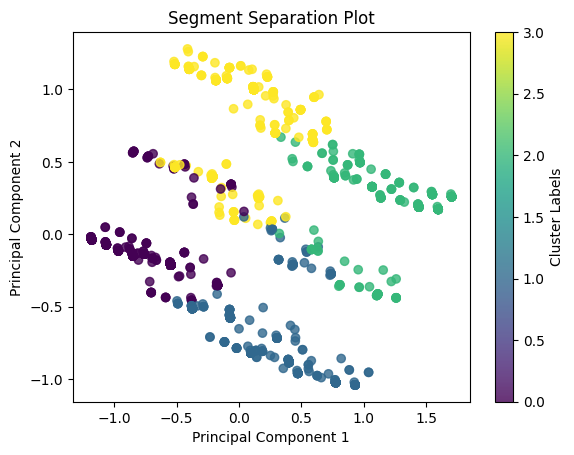

In [33]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=MD_k4, cmap='viridis', marker='o', alpha=0.8)
plt.title("Segment Separation Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Labels")
plt.show()

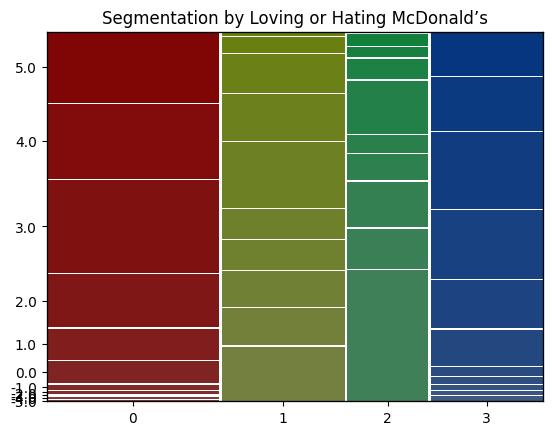

In [34]:
from statsmodels.graphics.mosaicplot import mosaic
MD_k4 = MD_kmeans.labels_
df_mosaic = pd.DataFrame({'Segment': MD_k4, 'Like': df['Like']})
ct = pd.crosstab(df_mosaic['Segment'], df_mosaic['Like'])
mosaic(ct.stack(), title='Segmentation by Loving or Hating McDonald’s', labelizer=lambda x: '')
plt.show()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_drop = ['Age', 'VisitFrequency', 'Gender']
df4 = df.drop(columns=columns_to_drop, axis=1)
df4

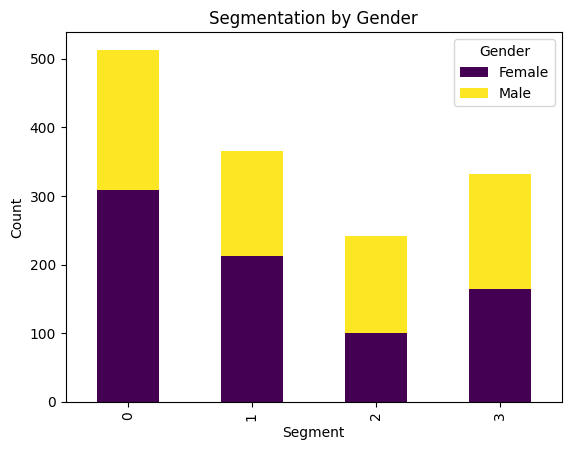

In [35]:
df_gender = pd.DataFrame({'Segment': MD_k4, 'Gender': df['Gender']})
ct_gender = pd.crosstab(df_gender['Segment'], df_gender['Gender'])

ct_gender.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Segmentation by Gender')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

In [36]:
df3['Segment'] = df_mosaic['Segment']
df3

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n,Segment
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,Every three months,Female,-3,1
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,Every three months,Female,2,3
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,Every three months,Female,1,3
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,Once a week,Female,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,Once a month,Male,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5.0,47,Once a year,Male,-5,2
1449,1,1,0,1,0,0,1,1,0,1,0,2.0,36,Once a week,Female,2,0
1450,1,1,0,1,0,1,0,1,1,0,0,3.0,52,Once a month,Female,3,3
1451,1,1,0,0,0,1,1,1,0,1,0,4.0,41,Every three months,Male,4,0


In [37]:
unique_values = df3['VisitFrequency'].unique()
print(unique_values)

['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']


In [38]:
df3['Gender'] = df3['Gender'].replace({'Male': 1, 'Female': 0})
df3['VisitFrequency'] = df3['VisitFrequency'].replace({'Once a week': 1, 'More than once a week': 2,
                                                       'Once a month': 3, 'Every three months': 4, 'Once a year': 5, 
                                                       'Never': 0})

df3

/tmp/ipykernel_33/336404117.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Gender'] = df3['Gender'].replace({'Male': 1, 'Female': 0})
/tmp/ipykernel_33/336404117.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['VisitFrequency'] = df3['VisitFrequency'].replace({'Once a week': 1, 'More than once a week': 2,


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n,Segment
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,4,0,-3,1
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,4,0,2,3
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,4,0,1,3
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,1,0,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,3,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5.0,47,5,1,-5,2
1449,1,1,0,1,0,0,1,1,0,1,0,2.0,36,1,0,2,0
1450,1,1,0,1,0,1,0,1,1,0,0,3.0,52,3,0,3,3
1451,1,1,0,0,0,1,1,1,0,1,0,4.0,41,4,1,4,0


Segment
0    2.744639
1    3.262295
2    2.946281
3    2.930723
Name: VisitFrequency, dtype: float64
Segment
0    2.920078
1   -1.218579
2   -2.652893
3    2.165663
Name: Like, dtype: float64
Segment
0    60
1    58
2    41
3    49
Name: Gender, dtype: int64


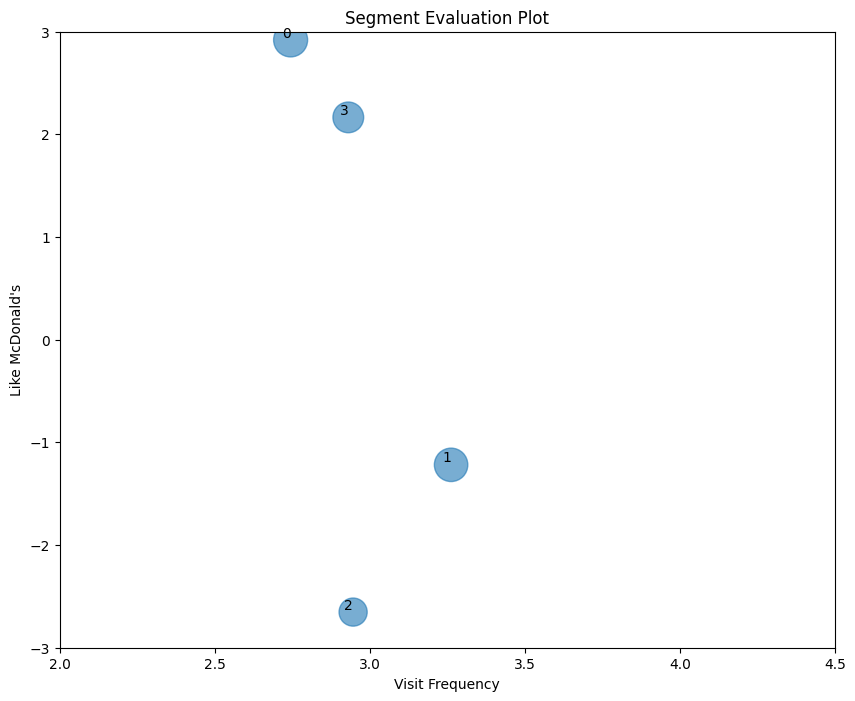

In [39]:
visit = df3.groupby('Segment')['VisitFrequency'].mean()
like = df3.groupby('Segment')['Like'].mean()
female = (1 - df3.groupby('Segment')['Gender'].mean()) * 100
female = female.astype(int)

print(visit)
print(like)
print(female)

plt.figure(figsize=(10, 8))
plt.scatter(visit, like, s=10 * female, alpha=0.6)
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

for i, txt in enumerate(visit.index):
    plt.text(visit[txt], like[txt], str(txt), ha='right', va='bottom')

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like McDonald\'s')
plt.title('Segment Evaluation Plot')
plt.show()